In [7]:
sns.__version__

'0.11.2'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

import warnings

# Statistics functions
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [128]:
# Suppressing a warning 
warnings.filterwarnings("ignore") 

# It is a magic function that renders the figure in the notebook
%matplotlib inline 

# Changing the figure size of a seaborn axes 
sns.set(rc={"figure.figsize": (20, 15)})

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

ID
Represents a unique identification of an entry

Customer_ID
Represents a unique identification of a person

Month
Represents the month of the year

Name
Represents the name of a person

Age
Represents the age of the person

SSN
Represents the social security number of a person

Occupation
Represents the occupation of the person

Annual_Income
Represents the annual income of the person

Monthly_Inhand_Salary
Represents the monthly base salary of a person

Num_Bank_Accounts
Represents the number of bank accounts a person holds

Num_Credit_Card
Represents the number of other credit cards held by a person

Interest_Rate
Represents the interest rate on credit card

Num_of_Loan
Represents the number of loans taken from the bank

Type_of_Loan
Represents the types of loan taken by a person

Delay_from_due_date
Represents the average number of days delayed from the payment date

Num_of_Delayed_Payment
Represents the average number of payments delayed by a person

Changed_Credit_Limit
Represents the percentage change in credit card limit

Num_Credit_Inquiries
Represents the number of credit card inquiries

Credit_Mix
Represents the classification of the mix of credits

Outstanding_Debt
Represents the remaining debt to be paid (in USD)

Credit_Utilization_Ratio
Represents the utilization ratio of credit card

Credit_History_Age
Represents the age of credit history of the person

Payment_of_Min_Amount
Represents whether only the minimum amount was paid by the person

Total_EMI_per_month
Represents the monthly EMI payments (in USD)

Amount_invested_monthly
Represents the monthly amount invested by the customer (in USD)

Payment_Behaviour
Represents the payment behavior of the customer (in USD)

Monthly_Balance
Represents the monthly balance amount of the customer (in USD)

Credit_Score
Represents the bracket of credit score (Poor, Standard, Good)

## Loading the Data sets

In [129]:
# train set
df_train = pd.read_csv("train.csv")

In [130]:
df_train.head().T

,0,1,2,3,4
ID,0x1602,0x1603,0x1604,0x1605,0x1606
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40
Month,January,February,March,April,May
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh
Age,23,23,-500,23,23
SSN,821-00-0265,821-00-0265,821-00-0265,821-00-0265,821-00-0265
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12
Monthly_Inhand_Salary,1824.843333,NaN,NaN,NaN,1824.843333
Num_Bank_Accounts,3,3,3,3,3


In [131]:
df_train.shape

(100000, 28)

In [132]:
# test set

df_test = pd.read_csv("test.csv")

In [133]:
df_test.head().T

,0,1,2,3,4
ID,0x160a,0x160b,0x160c,0x160d,0x1616
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0x21b1
Month,September,October,November,December,September
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Rick Rothackerj
Age,23,24,24,24_,28
SSN,821-00-0265,821-00-0265,821-00-0265,821-00-0265,004-07-5839
Occupation,Scientist,Scientist,Scientist,Scientist,_______
Annual_Income,19114.12,19114.12,19114.12,19114.12,34847.84
Monthly_Inhand_Salary,1824.843333,1824.843333,1824.843333,NaN,3037.986667
Num_Bank_Accounts,3,3,3,3,2


In [134]:
df_test.shape

(50000, 27)

In [135]:
# Checking if column headings are the same in both data set
dif_1 = [x for x in df_train.columns if x not in df_test.columns]
dif_1

['Credit_Score']

In [136]:
dif_2 = [x for x in df_test.columns if x not in df_train.columns]
dif_2

[]

## Checking missing data

In [137]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [138]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [139]:
# Drop the 'ID' column from the train set

df_train.drop(["ID"], axis=1, inplace=True)

In [140]:
# Save the list of 'Id' before dropping it from the test set

ID_test_list = df_test["ID"].tolist()
df_test.drop(["ID"], axis=1, inplace=True)

## Numeriacl Features

### <font color='darkblue'>I.2.1. Exploring and cleaning numerical features</font>

In [141]:
df_train_num = df_train.select_dtypes(exclude=["object"])
df_train_num

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
0,1824.843333,3,4,3,3,4.0,26.822620,49.574949
1,NaN,3,4,3,-1,4.0,31.944960,49.574949
2,NaN,3,4,3,3,4.0,28.609352,49.574949
3,NaN,3,4,3,5,4.0,31.377862,49.574949
4,1824.843333,3,4,3,6,4.0,24.797347,49.574949
...,...,...,...,...,...,...,...,...
99995,3359.415833,4,6,7,23,3.0,34.663572,35.104023
99996,3359.415833,4,6,7,18,3.0,40.565631,35.104023
99997,3359.415833,4,6,5729,27,3.0,41.255522,35.104023
99998,3359.415833,4,6,7,20,3.0,33.638208,35.104023


In [142]:
for col in df_train.columns :
    print(col)
    print(df_train[col].value_counts(dropna=False))
    print("##########################")

Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64
##########################
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64
##########################
Name
NaN               9985
Stevex              44
Langep              44
Jessicad            39
Vaughanl            39
                  ... 
Robin Pomeroyz       4
Matt Scuffhamk       4
Julieno              4
Bavierq              4
Timothyl             3
Name: Name, Length: 10140, dtype: int64
##########################
Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: Age, Length: 1788, dtype: int64
#########################

NaN                                 1200
__-333333333333333333333333333__       9
312.49408867943663                     1
347.413889978152                       1
254.9709216273975                      1
                                    ... 
366.2890379762706                      1
151.1882696261166                      1
306.75027851710234                     1
278.8720257394474                      1
393.6736955618808                      1
Name: Monthly_Balance, Length: 98793, dtype: int64
##########################
Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64
##########################


Kontrol edilecek sütunlar:

Age
Annual_Income
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
Num_of_Loan
Num_of_Delayed_Payment
Changed_Credit_Limit
Num_Credit_Inquiries
Num_Credit_Inquiries
Credit_Mix
Outstanding_Debt
Credit_History_Age
Total_EMI_per_month
Amount_invested_monthly
Payment_Behaviour
Monthly_Balance

In [143]:
df_train.sample(10)

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
33217,CUS_0x7279,February,Blamonts,44_,891-67-3760,Entrepreneur,41015.31,3585.942500,3,2,...,Good,1432.22,23.903313,23 Years and 6 Months,No,41.535468,205.3375948797713,High_spent_Small_value_payments,371.7211871000843,Good
357,CUS_0xaedb,June,NaN,19,272-47-1135,Musician,85554.03,7185.502500,4,2,...,Good,1095.73,25.026326,20 Years and 0 Months,No,0.000000,465.4277736563579,Low_spent_Large_value_payments,523.1224763436421,Good
11691,CUS_0x7993,April,Wahbax,24,849-60-6288,Media_Manager,61695.68,5230.306667,1,4,...,Good,654.6,39.484154,33 Years and 2 Months,No,101.182626,130.00865048287451,High_spent_Large_value_payments,531.839390531975,Standard
29988,CUS_0x6f88,May,Qing Xiaoyiy,14,791-16-1444,Writer,38126.94,3373.245000,8,9,...,Bad,1606.16,28.004957,11 Years and 7 Months,Yes,168.521147,NaN,High_spent_Small_value_payments,322.1863393009134,Poor
82477,CUS_0xb6e3,June,McCrankr,17_,244-69-5451,Mechanic,61533.36,5186.780000,8,3,...,Standard,1029.35,34.031658,NaN,Yes,251.522678,108.9937678941337,High_spent_Large_value_payments,398.161553636029,Standard
77165,CUS_0xc3ae,June,Masono,38,218-10-0201,Developer,35435.81,2889.628582,3,1,...,Good,1457.03,32.740709,20 Years and 2 Months,No,265.337908,106.60211445012972,Low_spent_Small_value_payments,386.7139786041454,Good
2409,CUS_0xa706,February,Matthiasr,50,475-31-3601,Manager,96275.84,NaN,6,6,...,_,999.36,36.864957,26 Years and 3 Months,Yes,64.961337,NaN,High_spent_Large_value_payments,897.7089303235599,Standard
57824,CUS_0x9337,January,Sineads,35,767-14-5838,Accountant,87502.04999999999,7589.837500,4,3,...,Good,1291.41,33.114758,28 Years and 3 Months,No,227.429079,693.2610521457929,Low_spent_Large_value_payments,108.29361920810436,Good
24551,CUS_0x5255,August,Woodallq,46,917-67-4033,Engineer,29873.96,2477.496667,5,4,...,Good,1117.08,39.053740,26 Years and 6 Months,No,0.000000,75.68106604610855,High_spent_Medium_value_payments,422.0686006205581,Poor
51539,CUS_0x5c1c,April,Sineadx,44,#F%$D@*&8,Writer,17794.505,1340.875417,5,4,...,Good,84.02,38.493582,31 Years and 0 Months,No,0.000000,44.17555384672558,High_spent_Medium_value_payments,339.91198781994115,Standard


## Cleaning Data

In [145]:
df_train.Age.sample(10)

5114      42
28251     24
75208     36
72252     22
14466     49
34375     25
29134     18
3896     25_
71805     27
22579     27
Name: Age, dtype: object

In [146]:
df_train.Age.value_counts(dropna=False)

38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: Age, Length: 1788, dtype: int64

In [147]:
df_train["Age"] = df_train.Age.str.replace("_","").astype(int)

In [148]:
df_Age_out_index = df_train[(df_train.Age < 0) | (df_train.Age > 90)].index

In [149]:
df_train.drop(index=df_Age_out_index, inplace=True)

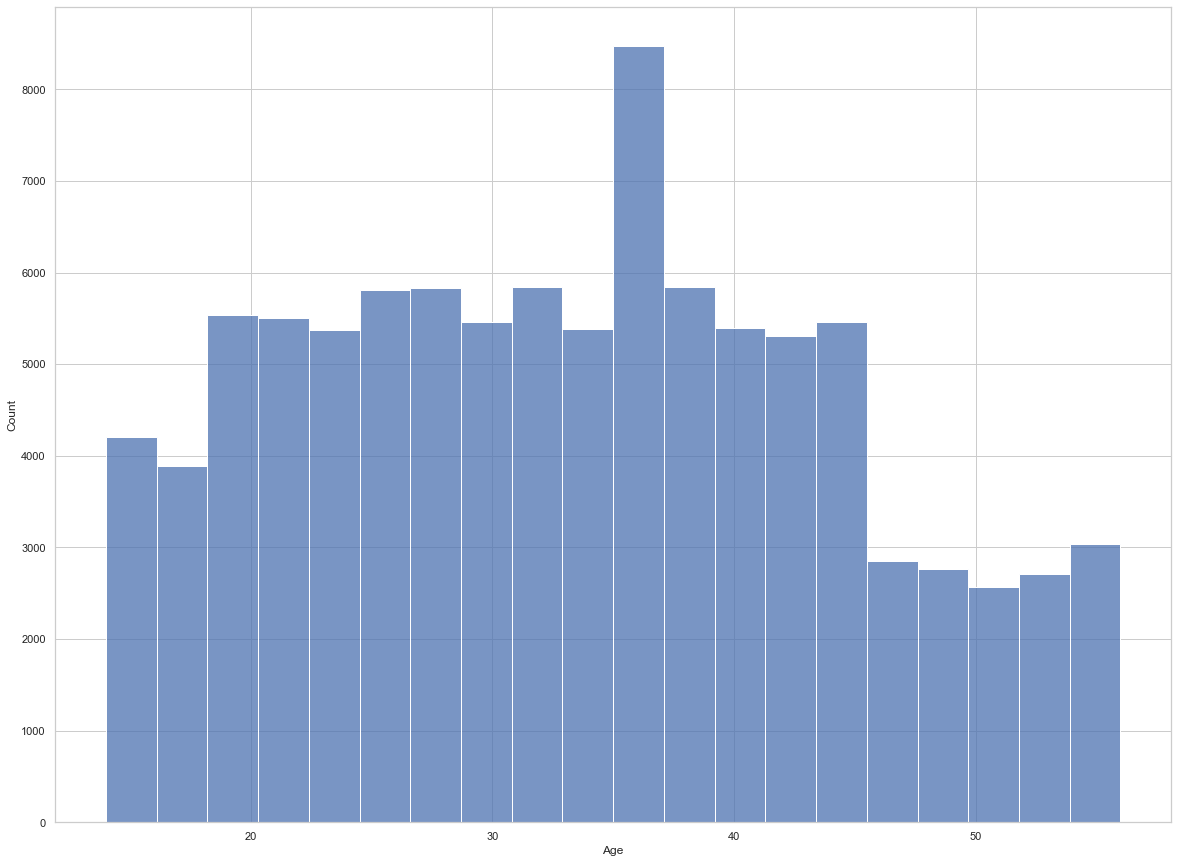

In [150]:
sns.histplot(df_train["Age"], bins=20);

In [151]:
df_train.Age.value_counts(dropna=False)

38    2994
28    2968
31    2955
26    2945
32    2884
36    2868
35    2866
25    2861
27    2859
39    2846
34    2837
44    2824
19    2793
41    2785
22    2785
20    2744
37    2742
29    2735
43    2734
30    2727
21    2716
24    2714
23    2654
45    2642
40    2609
42    2577
33    2543
18    2385
46    1621
15    1574
17    1502
16    1455
48    1385
49    1375
55    1366
52    1356
53    1354
54    1311
51    1291
50    1273
47    1227
14    1175
56     362
Name: Age, dtype: int64

In [152]:
for col in df_train.columns :
    print(col)
    print(df_train[col].value_counts(dropna=False))
    print("##########################")

Customer_ID
CUS_0x2646    8
CUS_0x5981    8
CUS_0x9c55    8
CUS_0xbcf     8
CUS_0x610a    8
             ..
CUS_0x2a1b    5
CUS_0x5465    5
CUS_0x9891    5
CUS_0x960f    5
CUS_0x6fa7    4
Name: Customer_ID, Length: 12500, dtype: int64
##########################
Month
August      12181
March       12169
July        12167
June        12162
May         12161
April       12134
January     12124
February    12121
Name: Month, dtype: int64
##########################
Name
NaN                 9716
Langep                43
Stevex                41
Jessicad              39
Danielz               38
                    ... 
Peter Rudegeaire       3
ras                    3
Yinka Adegokec         3
Groomp                 3
Timothyl               2
Name: Name, Length: 10140, dtype: int64
##########################
Age
38    2994
28    2968
31    2955
26    2945
32    2884
36    2868
35    2866
25    2861
27    2859
39    2846
34    2837
44    2824
19    2793
41    2785
22    2785
20    2744
37    27

NaN                                 1179
__-333333333333333333333333333__       9
312.49408867943663                     1
251.67631031607414                     1
415.32532309844316                     1
                                    ... 
337.24868607578526                     1
242.0122755161237                      1
309.4159683487181                      1
272.22357341904336                     1
393.6736955618808                      1
Name: Monthly_Balance, Length: 96033, dtype: int64
##########################
Credit_Score
Standard    51720
Poor        28205
Good        17294
Name: Credit_Score, dtype: int64
##########################


In [153]:
# Annual_Income
df_train["Annual_Income"] = df_train.Annual_Income.str.replace("_","").astype(float)

In [156]:
# Num_Bank_Accounts

df_train["Num_Bank_Accounts"].sample(20)

28326       5
61578       8
73917       0
48142       5
8768        2
1276        7
67749       4
84467       9
78330       5
36367       8
77423       0
78969       7
91340       2
45018       6
96937    1416
58311       5
96340       6
64892       5
91179      10
99547       5
Name: Num_Bank_Accounts, dtype: int64

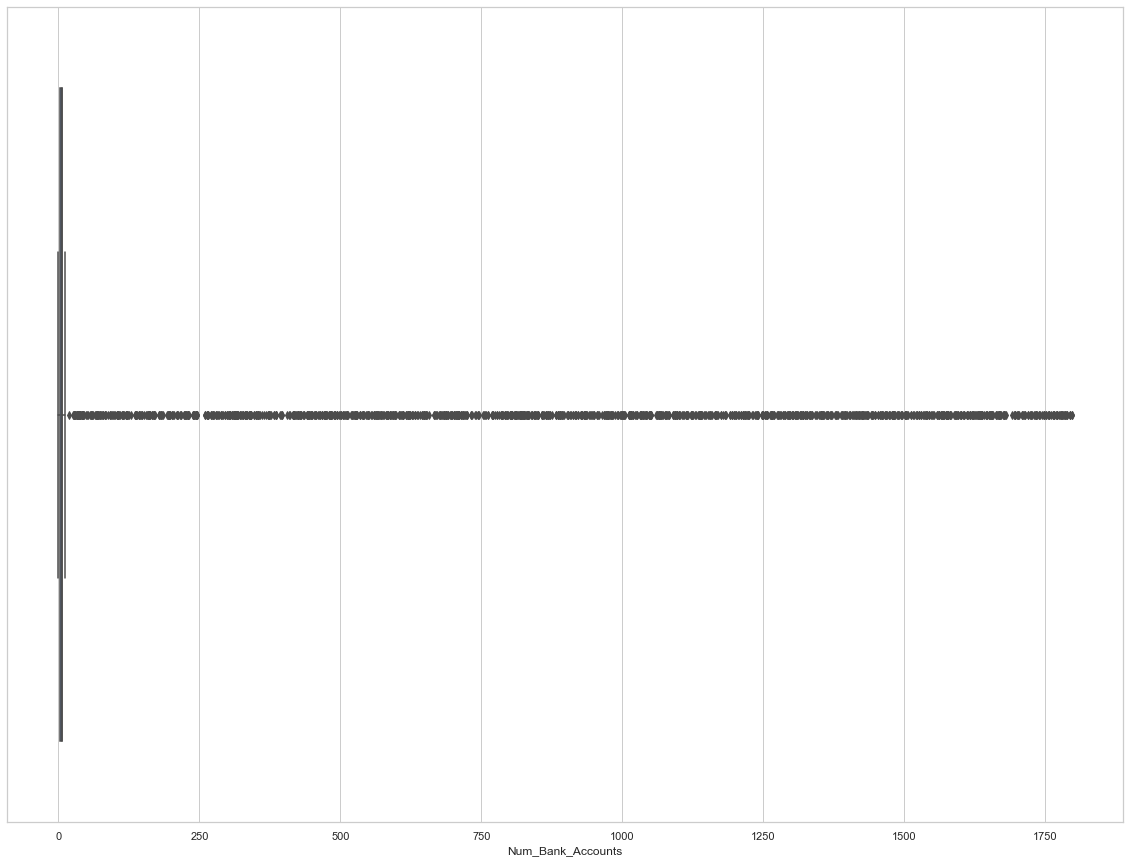

In [158]:
sns.boxplot(df_train.Num_Bank_Accounts);

In [160]:
q1 = df_train.Num_Bank_Accounts.quantile(0.25)
q3 = df_train.Num_Bank_Accounts.quantile(0.75)
iqr = q3 -q1
lower = q1 -1.5*iqr
upper = q3 + 1.5*iqr
lower, upper

(-3.0, 13.0)

In [169]:
indx_num_bank_accn = df_train[(df_train.Num_Bank_Accounts > upper) | (df_train.Num_Bank_Accounts < 0)].index

In [171]:
df_train.drop(index=indx_num_bank_accn, inplace=True)

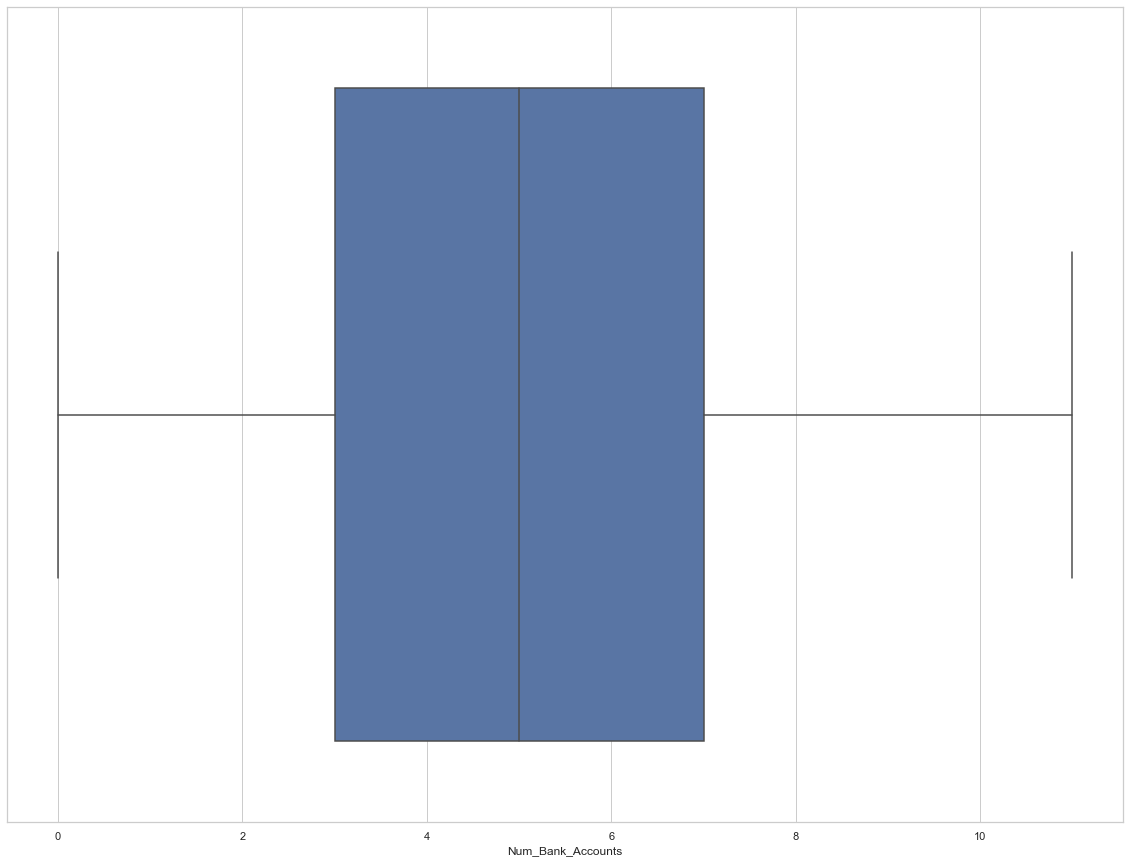

In [172]:
sns.boxplot(df_train.Num_Bank_Accounts);

In [173]:
# Num_Credit_Card

df_train.Num_Credit_Card.value_counts()

5       17700
7       15934
6       15883
4       13471
3       12742
        ...  
65          1
1140        1
515         1
290         1
679         1
Name: Num_Credit_Card, Length: 1161, dtype: int64

In [181]:
q1 = df_train.Num_Credit_Card.quantile(0.25)
q3 = df_train.Num_Credit_Card.quantile(0.75)
iqr = q3 -q1
lower = q1 -1.5*iqr
upper = q3 + 1.5*iqr
lower, upper

(-0.5, 11.5)

In [182]:
((df_train.Num_Credit_Card > upper) | (df_train.Num_Credit_Card < 0)).sum()

2184

In [183]:
df_train.Num_Credit_Card[(df_train.Num_Credit_Card > upper) | (df_train.Num_Credit_Card < 0)]

10       1385
40       1288
157      1029
163       488
207      1381
         ... 
99611     514
99615     232
99619    1430
99769     679
99811     158
Name: Num_Credit_Card, Length: 2184, dtype: int64

In [185]:
indx_num_crd_crd= df_train[(df_train.Num_Credit_Card > upper) | (df_train.Num_Credit_Card < 0)].index

In [186]:
df_train.drop(index=indx_num_crd_crd, inplace=True)

In [187]:
# Interest_Rate
df_train.Interest_Rate.value_counts()

8       4690
5       4656
6       4447
10      4255
12      4251
        ... 
5762       1
4372       1
4905       1
1683       1
5729       1
Name: Interest_Rate, Length: 1663, dtype: int64

In [188]:
q1 = df_train.Interest_Rate.quantile(0.25)
q3 = df_train.Interest_Rate.quantile(0.75)
iqr = q3 -q1
lower = q1 -1.5*iqr
upper = q3 + 1.5*iqr
lower, upper

(-10.0, 38.0)

In [190]:
(df_train.Interest_Rate < 0).sum()

0

In [197]:
(df_train.Interest_Rate > 38).sum()

1920

In [191]:
((df_train.Interest_Rate > upper) | (df_train.Interest_Rate < 0)).sum()

1920

In [199]:
df_train.shape

(93732, 27)

In [201]:
ind_Int_rt = df_train[(df_train.Interest_Rate > upper) | (df_train.Interest_Rate < 0)].index

In [202]:
df_train.drop(index=ind_Int_rt, inplace=True)

In [203]:
df_train.shape

(91812, 27)

In [204]:
# Num_of_Loan

df_train.Num_of_Loan.value_counts()

3       13198
2       13114
4       12904
0        9493
1        9234
        ...  
241         1
630_        1
252         1
745         1
966         1
Name: Num_of_Loan, Length: 400, dtype: int64

In [210]:
df_train.Num_of_Loan.sample(20)

97404     9
93506     7
37478     2
8717      4
33427     1
31786     7
12092     2
94648     0
79939     5
89471     2
5077      4
53346     3
47326     3
53952     1
18984     2
92010     6
59322     4
40321    1_
95286     8
23318     3
Name: Num_of_Loan, dtype: object

In [212]:
df_train["Num_of_Loan"] = df_train.Num_of_Loan.str.replace("_","").astype(int)

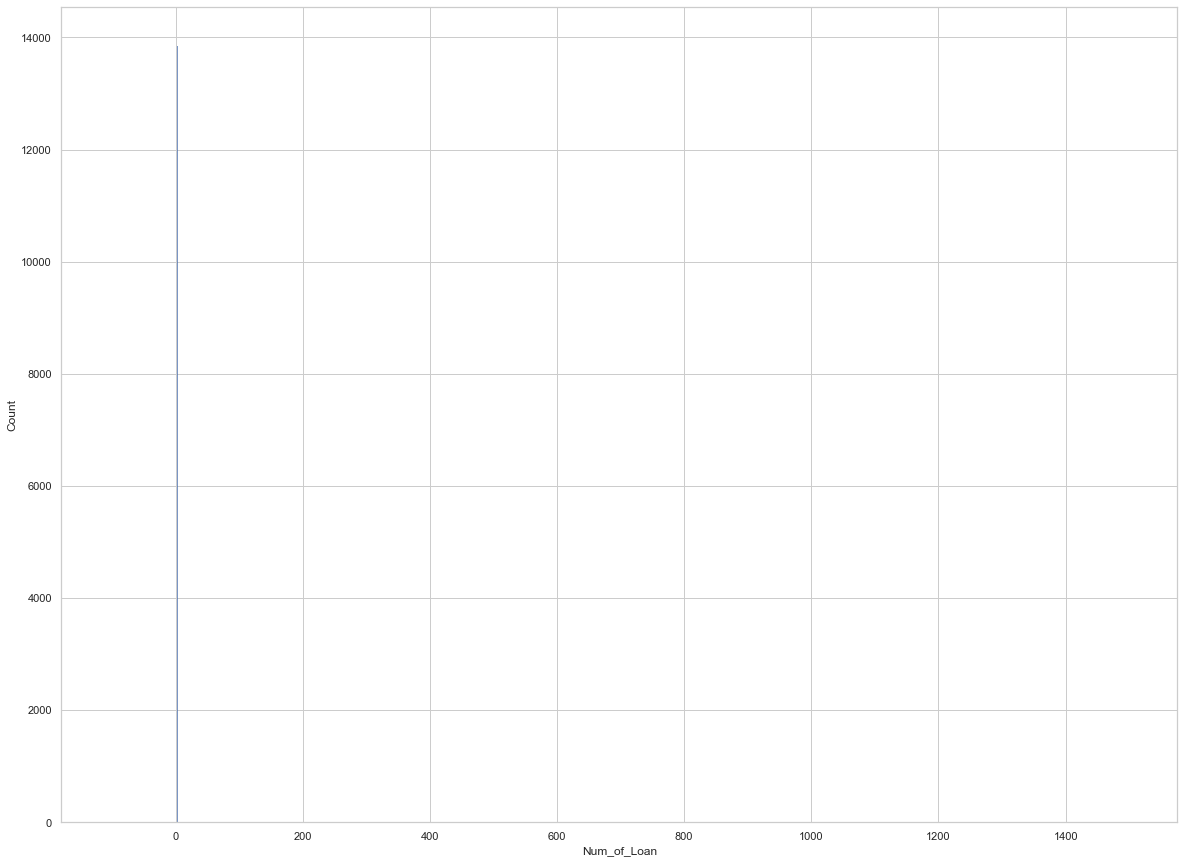

In [213]:
sns.histplot(df_train["Num_of_Loan"]);

In [214]:
q1 = df_train.Num_of_Loan.quantile(0.25)
q3 = df_train.Num_of_Loan.quantile(0.75)
iqr = q3 - q1
lower = q1 -1.5*iqr
upper = q3 + 1.5*iqr
lower, upper

(-5.0, 11.0)

In [215]:
(df_train.Num_of_Loan < 0).sum()

3561

In [217]:
df_train.Num_of_Loan[df_train.Num_of_Loan < 0].value_counts()

-100    3561
Name: Num_of_Loan, dtype: int64

In [220]:
ind_num_loan = df_train[df_train.Num_of_Loan > upper].index

In [221]:
df_train.drop(index=ind_num_loan, inplace=True)

In [222]:
df_train.shape

(91383, 27)

In [223]:
# Delay_from_due_date
df_train.Delay_from_due_date.value_counts()

 15    3292
 13    3147
 8     3052
 14    3014
 10    3005
       ... 
-4       57
 65      52
 66      30
-5       29
 67      17
Name: Delay_from_due_date, Length: 73, dtype: int64

In [226]:
df_train.Delay_from_due_date.sample(20)

83430     0
82771    28
86804    29
4523     20
50861     4
42076    12
29263     7
57706     9
15363    14
7208      3
75245    19
59125    28
50330    11
29135    52
57449    30
14239    47
22726    18
36999    61
11918    31
95588    39
Name: Delay_from_due_date, dtype: int64

In [227]:
# 
df_train.Num_of_Delayed_Payment.value_counts()

19      4852
17      4825
10      4715
16      4677
15      4650
        ... 
1502       1
4075       1
2697       1
3845       1
2047       1
Name: Num_of_Delayed_Payment, Length: 680, dtype: int64

In [230]:
df_train.Num_of_Delayed_Payment.sample(20)

87017     15
8143       9
26419     24
60718     20
40126     21
85469     17
46302     17
45795      9
14822     13
16286     13
38190      7
69415      7
64418     19
26220    NaN
13221      4
72032     10
53148     18
54061      1
63326     -2
57435    NaN
Name: Num_of_Delayed_Payment, dtype: object

In [232]:
df_train["Num_of_Delayed_Payment"] = df_train.Num_of_Delayed_Payment.str.replace("_", "").astype(float)

In [234]:
q1 = df_train.Num_of_Delayed_Payment.quantile(0.25)
q3 = df_train.Num_of_Delayed_Payment.quantile(0.75)
iqr = q3 - q1
lower = q1 -1.5*iqr
upper = q3 + 1.5*iqr
lower, upper

(-4.5, 31.5)

In [235]:
(df_train.Num_of_Delayed_Payment < 0).sum()

596

In [237]:
df_train[df_train.Num_of_Delayed_Payment < 0].Num_of_Delayed_Payment.value_counts()

-1.0    293
-2.0    216
-3.0     87
Name: Num_of_Delayed_Payment, dtype: int64

In [239]:
ind_num_del_paym = df_train[df_train.Num_of_Delayed_Payment > upper].index

In [240]:
df_train.drop(index=ind_num_del_paym, inplace=True)

In [241]:
df_train.shape

(90723, 27)

In [242]:
# Changed_Credit_Limit

df_train.Changed_Credit_Limit.value_counts()

_                      1898
8.22                    122
11.5                    120
11.32                   117
10.06                   110
                       ... 
-1.2799999999999998       1
28.09                     1
0.07000000000000027       1
-2.56                     1
16.810000000000002        1
Name: Changed_Credit_Limit, Length: 4331, dtype: int64

In [247]:
df_train.Changed_Credit_Limit.sample(20)

75405    17.85
94083      4.0
50882    15.12
81070     9.96
83237     9.41
47635     2.36
31442     1.99
71317     1.16
1329      8.08
91114     2.17
86688     6.28
81886     1.69
98015     5.79
42159     1.06
90161    13.22
77367    18.13
10178     7.66
19190     1.48
32246      6.7
81019    12.64
Name: Changed_Credit_Limit, dtype: object

In [249]:
df_train.Changed_Credit_Limit = df_train.Changed_Credit_Limit.replace("_", np.nan).astype(float)

In [250]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90723 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               90723 non-null  object 
 1   Month                     90723 non-null  object 
 2   Name                      81648 non-null  object 
 3   Age                       90723 non-null  int32  
 4   SSN                       90723 non-null  object 
 5   Occupation                90723 non-null  object 
 6   Annual_Income             90723 non-null  float64
 7   Monthly_Inhand_Salary     77079 non-null  float64
 8   Num_Bank_Accounts         90723 non-null  int64  
 9   Num_Credit_Card           90723 non-null  int64  
 10  Interest_Rate             90723 non-null  int64  
 11  Num_of_Loan               90723 non-null  int32  
 12  Type_of_Loan              80416 non-null  object 
 13  Delay_from_due_date       90723 non-null  int64  
 14  Num_of

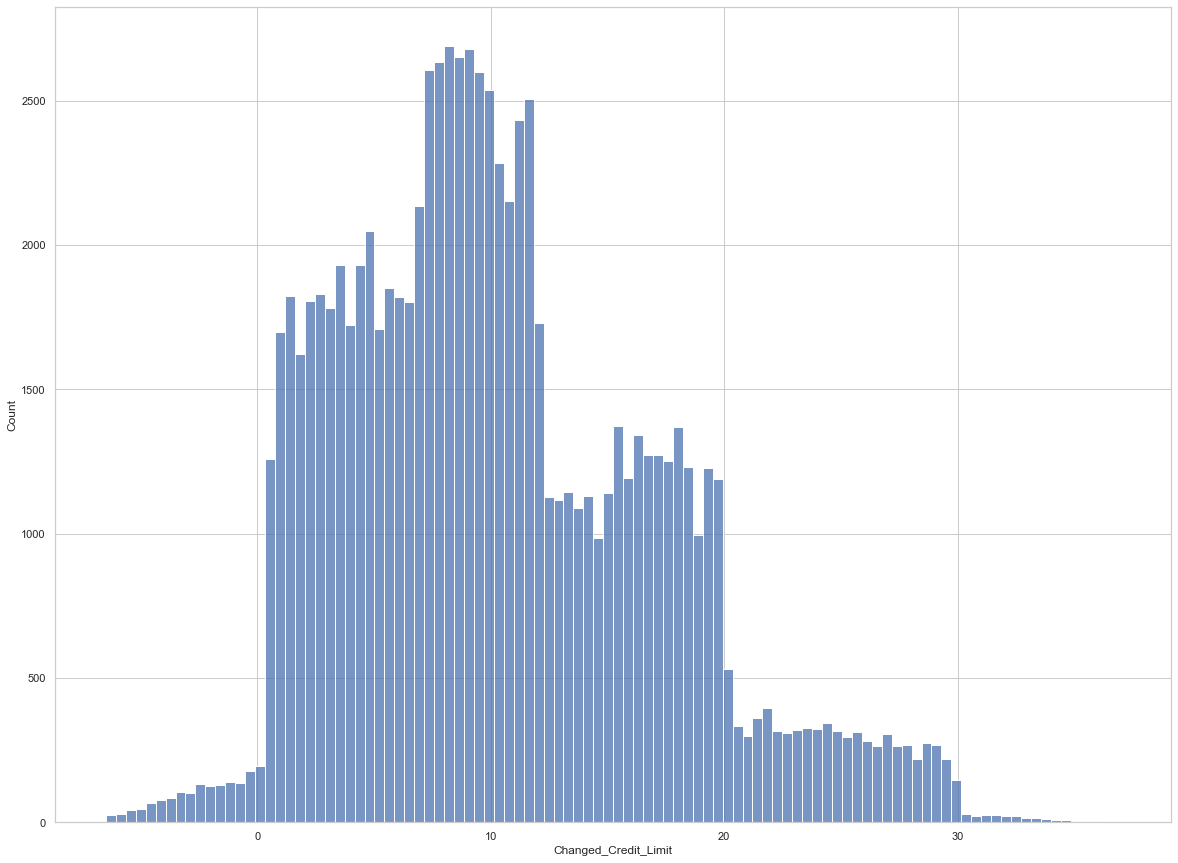

In [251]:
sns.histplot(df_train.Changed_Credit_Limit);

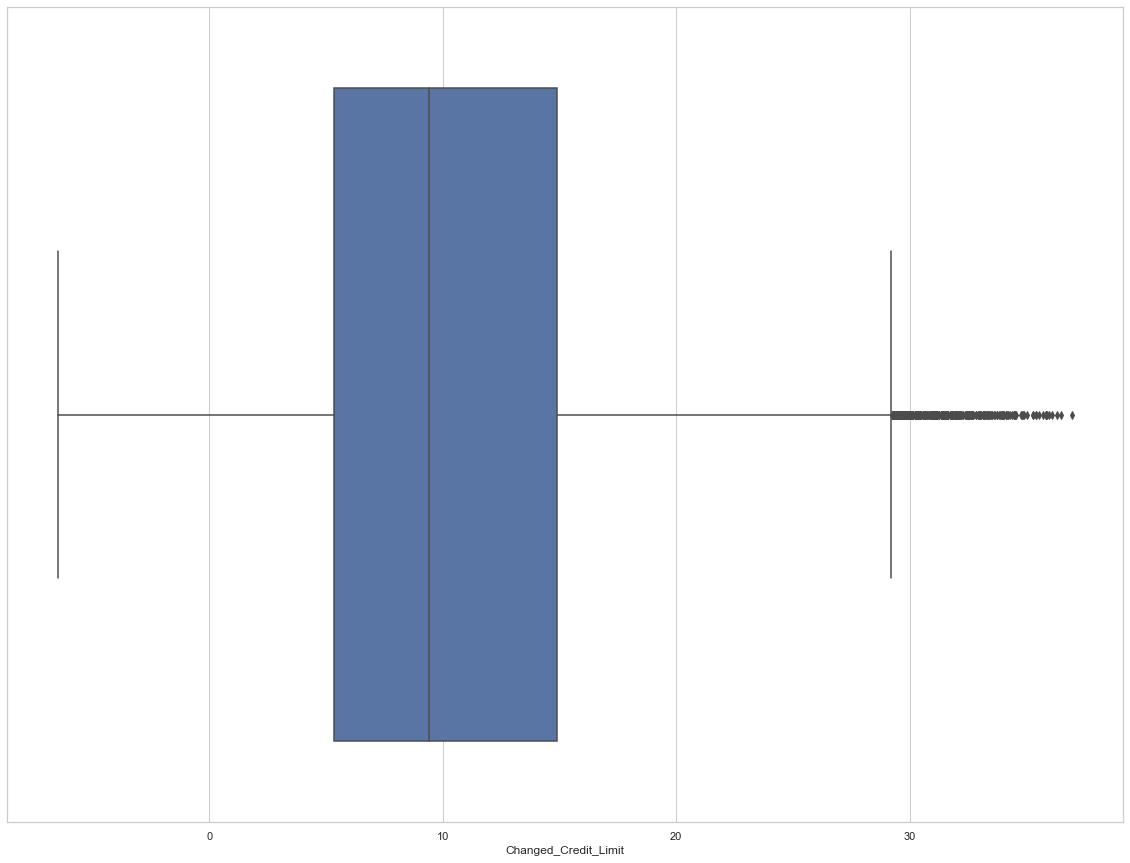

In [253]:
sns.boxplot(df_train.Changed_Credit_Limit);

In [259]:
# Num_Credit_Inquiries      

df_train.Num_Credit_Inquiries.sample(20)

87646       4.0
26749       0.0
5554       10.0
43026      12.0
83200       0.0
98059       8.0
29710    2444.0
83599      12.0
74116       3.0
98623      12.0
85309      12.0
33580       2.0
69055       9.0
91811       4.0
6980       10.0
67934       2.0
73576       0.0
80518      11.0
76259       6.0
85547      12.0
Name: Num_Credit_Inquiries, dtype: float64

In [260]:
df_train.Num_Credit_Inquiries.value_counts()

4.0       10254
3.0        8052
6.0        7372
7.0        7319
2.0        7303
          ...  
267.0         1
1796.0        1
566.0         1
2231.0        1
74.0          1
Name: Num_Credit_Inquiries, Length: 1156, dtype: int64

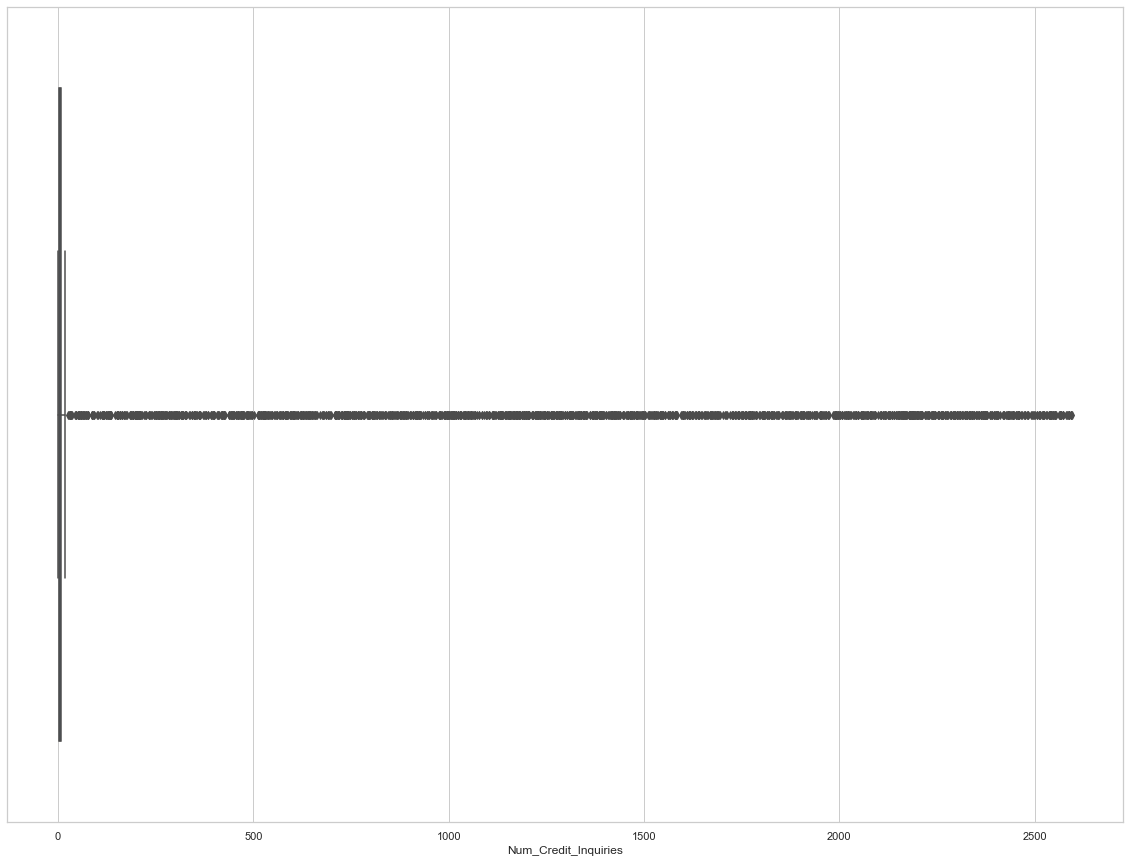

In [262]:
sns.boxplot(df_train.Num_Credit_Inquiries);

In [263]:
q1 = df_train.Num_Credit_Inquiries.quantile(0.25)
q3 = df_train.Num_Credit_Inquiries.quantile(0.75)
iqr = q3 - q1
lower = q1 -1.5*iqr
upper = q3 + 1.5*iqr
lower, upper

(-6.0, 18.0)

In [265]:
(df_train.Num_Credit_Inquiries < 0).sum()

0

In [269]:
ind_num_crd_Inq = df_train[df_train.Num_Credit_Inquiries > upper].index

In [270]:
df_train.drop(index=ind_num_crd_Inq, inplace=True)

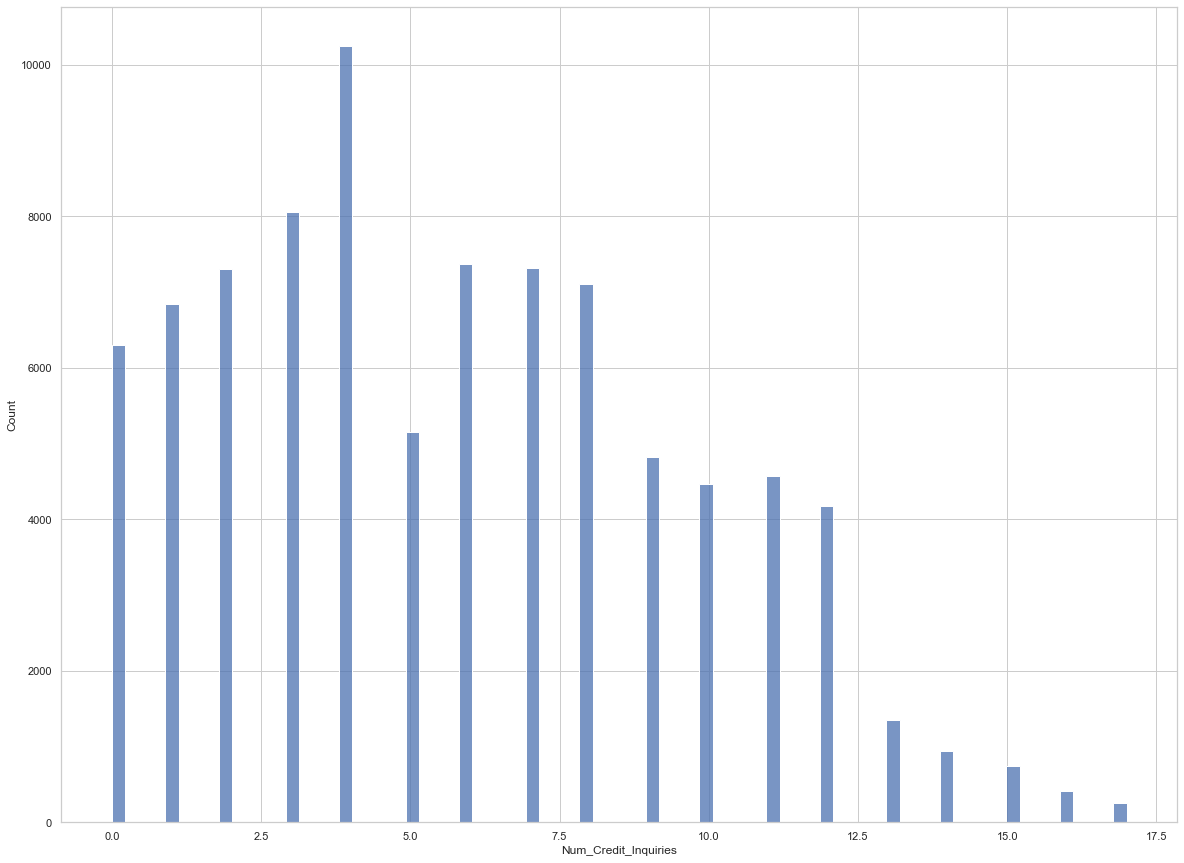

In [272]:
sns.histplot(df_train.Num_Credit_Inquiries);

In [273]:
# Outstanding_Debt
df_train.Outstanding_Debt.str.replace("_","").astype(float)

0        809.98
1        809.98
3        809.98
4        809.98
5        809.98
          ...  
99994    502.38
99995    502.38
99996    502.38
99998    502.38
99999    502.38
Name: Outstanding_Debt, Length: 89202, dtype: float64

In [275]:
sns.histplot(df_train.Outstanding_Debt);

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000197D9E57E50> (for post_execute):


KeyboardInterrupt: 

In [276]:
# 
df_train.Credit_Utilization_Ratio.value_counts()

26.822620    1
36.037770    1
30.364044    1
27.371427    1
28.178892    1
            ..
41.719123    1
25.616576    1
38.149774    1
34.967972    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 89202, dtype: int64

In [281]:
# Credit_History_Age
df_train["Credit_History_Age"] =df_train.Credit_History_Age.str.split().str[0].astype(float)*12 + df_train.Credit_History_Age.str.split().str[3].astype(float)

In [282]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89202 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               89202 non-null  object 
 1   Month                     89202 non-null  object 
 2   Name                      80278 non-null  object 
 3   Age                       89202 non-null  int32  
 4   SSN                       89202 non-null  object 
 5   Occupation                89202 non-null  object 
 6   Annual_Income             89202 non-null  float64
 7   Monthly_Inhand_Salary     75778 non-null  float64
 8   Num_Bank_Accounts         89202 non-null  int64  
 9   Num_Credit_Card           89202 non-null  int64  
 10  Interest_Rate             89202 non-null  int64  
 11  Num_of_Loan               89202 non-null  int32  
 12  Type_of_Loan              79074 non-null  object 
 13  Delay_from_due_date       89202 non-null  int64  
 14  Num_of

In [283]:
# Payment_of_Min_Amount


In [287]:
# Amount_invested_monthly
df_train[df_train.Amount_invested_monthly == "__10000__"].sample(10).T

,97499,15665,50317,40338,99107,67968,68903,17799,66417,79891
Customer_ID,CUS_0x9f63,CUS_0x8f4,CUS_0x26d7,CUS_0x7df0,CUS_0x8eb8,CUS_0x84dd,CUS_0x87d8,CUS_0x2e5f,CUS_0x6a6f,CUS_0x5035
Month,April,February,June,March,April,January,August,August,February,April
Name,Kirschbaumy,NaN,Christina Finchera,Mikolajczakc,Reijiy,Orane,Seetharamanc,Felsenthalc,LaCaprae,Dough
Age,54,49,49,22,49,44,53,40,41,52
SSN,350-61-4067,884-12-2323,253-33-8522,575-37-4253,530-13-2709,392-43-1088,537-76-1274,067-86-9905,898-93-3892,560-30-9828
Occupation,_______,Developer,Developer,Doctor,Mechanic,Engineer,Engineer,Musician,Lawyer,Entrepreneur
Annual_Income,21009.425,27525.02,21623.465,16520.79,19805347.0,18702.5,88818.56,82668.24,18754.65,34053.4
Monthly_Inhand_Salary,1531.785417,2239.751667,1776.955417,1110.7325,3276.82,1736.541667,NaN,6873.02,1588.8875,2670.783333
Num_Bank_Accounts,0,6,2,3,6,4,2,7,4,1
Num_Credit_Card,4,6,4,5,4,4,1,4,7,2


In [289]:
df_train[df_train.Amount_invested_monthly == "__10000__"].count()

Customer_ID                 3829
Month                       3829
Name                        3408
Age                         3829
SSN                         3829
Occupation                  3829
Annual_Income               3829
Monthly_Inhand_Salary       3250
Num_Bank_Accounts           3829
Num_Credit_Card             3829
Interest_Rate               3829
Num_of_Loan                 3829
Type_of_Loan                3432
Delay_from_due_date         3829
Num_of_Delayed_Payment      3555
Changed_Credit_Limit        3751
Num_Credit_Inquiries        3754
Credit_Mix                  3829
Outstanding_Debt            3829
Credit_Utilization_Ratio    3829
Credit_History_Age          3488
Payment_of_Min_Amount       3829
Total_EMI_per_month         3829
Amount_invested_monthly     3829
Payment_Behaviour           3829
Monthly_Balance             3770
Credit_Score                3829
dtype: int64

In [290]:
df_train.isnull().sum()

Customer_ID                     0
Month                           0
Name                         8924
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       13424
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10128
Delay_from_due_date             0
Num_of_Delayed_Payment       6310
Changed_Credit_Limit         1867
Num_Credit_Inquiries         1765
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8088
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3964
Payment_Behaviour               0
Monthly_Balance              1086
Credit_Score                    0
dtype: int64

In [304]:
df_train.Monthly_Balance.sample(20)

79480     361.8387263497413
20247     65.34606251364119
86931    432.68018324777313
8350       283.841668206501
86377     477.7471215805828
85520     560.0123830027301
21904    323.71218031395506
46138     938.0698439595964
20904       325.49316681152
94045    388.27855325133515
91712     738.5297326788278
2002      876.8718421623806
96311     331.3674406861581
72434     460.8127841312016
52155     261.1087332602075
52353      836.419184386563
46935     599.2374061871967
82360     649.4195748025029
98386             482.46947
11199    377.51047862975327
Name: Monthly_Balance, dtype: object

In [306]:
df_train.Monthly_Balance.value_counts()

__-333333333333333333333333333__    9
312.49408867943663                  1
539.6843455771939                   1
411.91003499485385                  1
397.6222546309338                   1
                                   ..
684.7252930239073                   1
356.3536666579201                   1
351.76766356061637                  1
481.49987481525886                  1
393.6736955618808                   1
Name: Monthly_Balance, Length: 88108, dtype: int64

In [305]:
df_train.Monthly_Balance.str.replace("_", "").astype(float)

ValueError: could not convert string to float: '__-333333333333333333333333333__'

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
7,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
17,CUS_0x2dbc,February,NaN,34,486-85-3974,Engineer,143162.64,12187.220000,1,5,...,Good,1303.01,41.702573,214.0,No,246.992319,232.86038375993544,High_spent_Small_value_payments,998.8692967863226,Good
22,CUS_0x2dbc,July,NaN,34,486-85-3974,Engineer,143162.64,12187.220000,1,5,...,Good,1303.01,38.068624,219.0,No,246.992319,263.17416316163934,High_spent_Small_value_payments,968.5555173846187,Standard
64,CUS_0x4157,January,NaN,23,070-19-1622,Doctor,114838.41,9843.867500,2,5,...,Good,1377.74,33.664554,256.0,No,226.892792,215.19351594560425,High_spent_Small_value_payments,802.3004421328528,Good
80,CUS_0xa66b,January,NaN,40,221-30-8554,Teacher,33751.27,2948.605833,5,5,...,Standard,1328.93,37.089076,230.0,NM,65.008174,117.30669710658556,High_spent_Medium_value_payments,362.54571194023237,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99964,CUS_0x372c,May,NaN,18,340-85-7301,Lawyer,42903.79,3468.315833,0,4,...,Good,1079.48,23.140640,341.0,No,34.975457,450.6460933992599,Low_spent_Small_value_payments,151.210033,Good
99965,CUS_0x372c,June,NaN,19,340-85-7301,Lawyer,42903.79,3468.315833,0,4,...,Good,1079.48,35.549456,342.0,No,34.975457,187.3559686116327,Low_spent_Large_value_payments,394.500158,Good
99969,CUS_0xf16,February,NaN,45,868-70-2218,Media_Manager,16680.35,1528.029167,1,1,...,Good,897.16,34.085971,254.0,No,41.113561,104.64623687765652,High_spent_Small_value_payments,267.043119,Good
99973,CUS_0xf16,June,NaN,45,868-70-2218,Media_Manager,16680.35,1528.029167,1,1,...,Good,897.16,24.972853,258.0,No,41.113561,__10000__,Low_spent_Small_value_payments,233.301539,Good


In [294]:
df_train[df_train.Customer_ID=="CUS_0x2dbc"]

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
16,CUS_0x2dbc,January,Langep,34,486-85-3974,_______,143162.64,12187.22,1,5,...,Good,1303.01,28.616735,213.0,No,246.992319,168.413702679309,!@9#%8,1043.3159778669492,Good
17,CUS_0x2dbc,February,NaN,34,486-85-3974,Engineer,143162.64,12187.22,1,5,...,Good,1303.01,41.702573,214.0,No,246.992319,232.86038375993544,High_spent_Small_value_payments,998.8692967863226,Good
18,CUS_0x2dbc,March,Langep,34,486-85-3974,_______,143162.64,NaN,1,5,...,Good,1303.01,26.519815,215.0,No,246.992319,__10000__,High_spent_Small_value_payments,715.741367403555,Good
19,CUS_0x2dbc,April,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,5,...,_,1303.01,39.501648,NaN,No,246.992319,825.2162699393922,Low_spent_Medium_value_payments,426.5134106068658,Good
20,CUS_0x2dbc,May,Langep,34,486-85-3974,_______,143162.64,12187.22,1,5,...,Good,1303.01,31.376150,217.0,No,246.992319,430.9475278803298,Low_spent_Large_value_payments,810.7821526659284,Good
22,CUS_0x2dbc,July,NaN,34,486-85-3974,Engineer,143162.64,12187.22,1,5,...,Good,1303.01,38.068624,219.0,No,246.992319,263.17416316163934,High_spent_Small_value_payments,968.5555173846187,Standard
23,CUS_0x2dbc,August,Langep,34,486-85-3974,Engineer,143162.64,12187.22,1,5,...,Good,1303.01,38.374753,220.0,No,246.992319,__10000__,High_spent_Small_value_payments,895.494583180492,Standard
